In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read The File

In [48]:
df = pd.read_csv('pakaian_pria_shopee_sales_cleaning.csv')

# NAN Analysis

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama             2378 non-null   object 
 1   kategori         2378 non-null   object 
 2   jenis            1882 non-null   object 
 3   lokasi           2378 non-null   object 
 4   harga_rata2      2378 non-null   float64
 5   terjual          2378 non-null   int64  
 6   rating           2378 non-null   float64
 7   jumlah_review    2378 non-null   int64  
 8   toko             2378 non-null   object 
 9   umur_bulan_toko  2378 non-null   int64  
 10  n_produk_toko    2378 non-null   int64  
 11  pengikut_toko    2378 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 223.1+ KB


In [50]:
df['jenis'].isnull().mean()*100

20.857863751051305

In [51]:
df['jenis'] = df['jenis'].apply(lambda x: str(x).replace('nan', 'tidak ada jenis'))

# Numerical Columns

In [52]:
num_columns = [column for column in df.columns if df[column].dtype != 'O' ]
num_descrete = [column for column in num_columns if len(df[column].unique()) < 15]
num_continue = [column for column in num_columns if column not in num_descrete]

## Continuous Columns

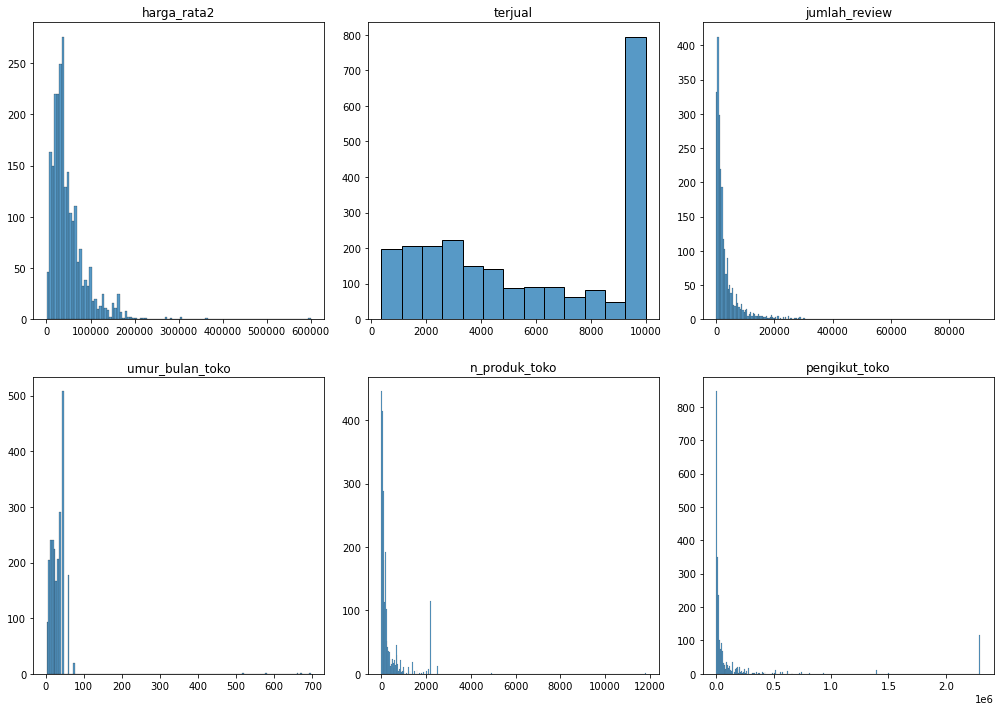

In [59]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
i = 0
for column in num_continue:
    plt.subplot(2,3, i+1)
    sns.histplot(data=df, x=column)
    plt.title(column)
    plt.ylabel('')
    plt.xlabel(' ')
    plt.tight_layout()
    i += 1

In [60]:
df2 = df.copy()
for column in num_continue:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR
    upper_limit = Q3 + IQR   
    df2 = df2[(df2[column] > lower_limit)&(df2[column] < upper_limit)]

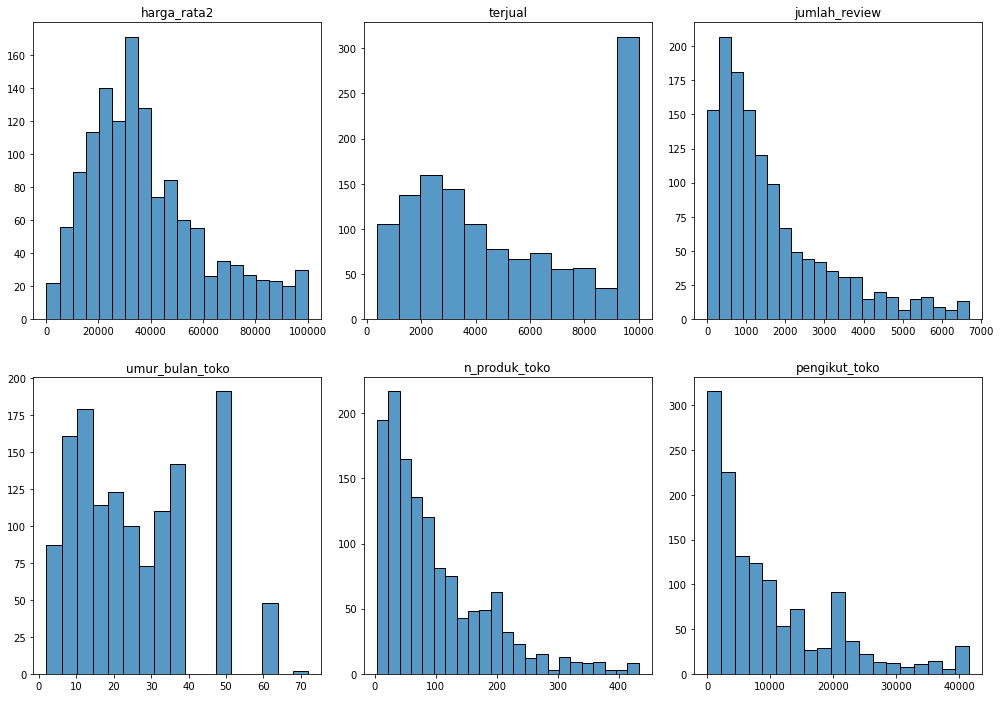

In [61]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
i = 0
for column in num_continue:
    plt.subplot(2,3, i+1)
    sns.histplot(data=df2, x=column)
    plt.title(column)
    plt.ylabel('')
    plt.xlabel(' ')
    plt.tight_layout()
    i += 1

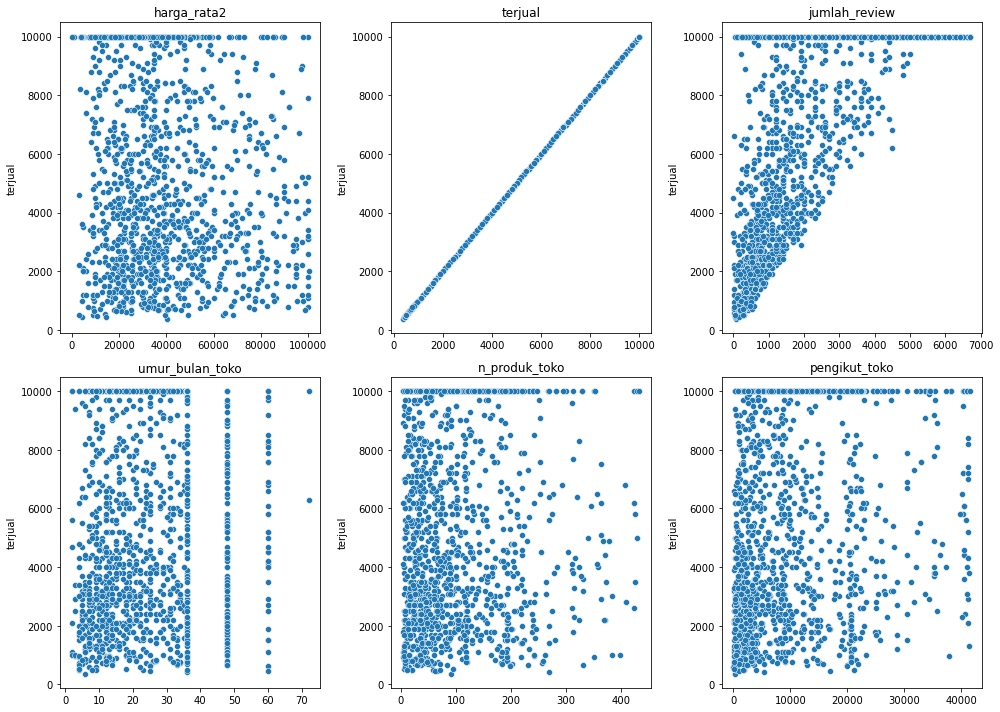

In [72]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
i = 0 
for col in num_continue:
    plt.subplot(2,3, i+1)
    sns.scatterplot(data=df2, x=col, y='terjual')
    plt.xlabel('')
    plt.title(col)
    plt.tight_layout()
    i+=1

#### 'jumlah_review' is the only one feature with postitive correlation with 'terjual'

## Discrete Columns

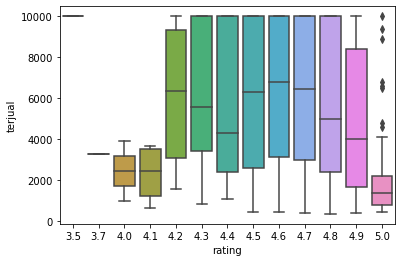

In [73]:
for column in num_descrete:
    plt.figure()
    sns.boxplot(data=df, x=column, y='terjual')

#### There are no essential information from the 'rating' chart with 'terjual'

# Categorical Columns

In [75]:
cat_columns = [column for column in df.columns if column not in num_columns + ['nama']]

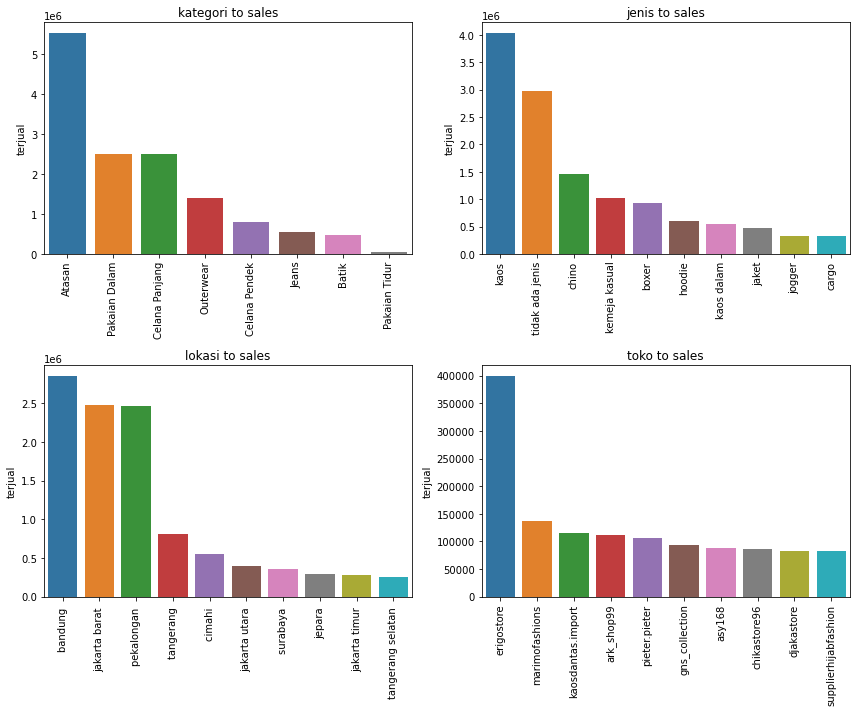

In [83]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
i = 0 
for col in cat_columns:
    plt.subplot(2,2, i+1)
    data_vis = df.groupby([col])['terjual'].sum().reset_index().sort_values(by='terjual', ascending=False)
    lim_data_vis = data_vis[0:10]
    sns.barplot(data=lim_data_vis, x=col, y='terjual')
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.title(col + ' to sales')
    plt.tight_layout()
    i+=1

#### Atasan is the top sales in Shopee Indonesia with kaos as a specific item in jenis, the top location of the stores are Bandung followed by Jakarta Barat and Pekalongan. Erigostore is a top stores in the market.